In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../../xapres")
import xapres as xa
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
multi_burst_TG = '/Users/jkingslake/Documents/science/ApRES/xapres/data/sample/multi-burst-dat-file/DATA2022-05-22-1939.DAT'
fd = xa.load.from_dats()

c = fd.load(multi_burst_TG, attended=False)

In [20]:
w = c.isel(chirp_num=0).profile.displacement_timeseries(min_depth_for_ezz_fit=0).velocity
w = c.isel(chirp_num=0).profile.displacement_timeseries(max_depth_for_ezz_fit=800).velocity
w = c.isel(chirp_num=0).profile.displacement_timeseries(min_depth_for_ezz_fit=1000).velocity
w = c.isel(chirp_num=0).profile.displacement_timeseries(max_depth_for_ezz_fit=3000).velocity
w = c.isel(chirp_num=0).profile.displacement_timeseries(min_depth_for_ezz_fit=0, max_depth_for_ezz_fit=800).velocity
w = c.isel(chirp_num=0).profile.displacement_timeseries(min_depth_for_ezz_fit=1000, max_depth_for_ezz_fit=2000).velocity
w = c.isel(chirp_num=0).profile.displacement_timeseries(min_depth_for_ezz_fit=1000, max_depth_for_ezz_fit=1e9).velocity
w = c.profile.displacement_timeseries(min_depth_for_ezz_fit=0).velocity
w = c.profile.displacement_timeseries(min_depth_for_ezz_fit=1000, max_depth_for_ezz_fit=1e9).velocity

# setting the old fit limit: lower_limit_on_fit
w = c.isel(chirp_num=0).profile.displacement_timeseries(lower_limit_on_fit=1000).velocity

c.profile.displacement_timeseries(min_depth_for_ezz_fit=1000, max_depth_for_ezz_fit=30)
c.profile.displacement_timeseries(min_depth_for_ezz_fit=1000)


min_depth_for_ezz_fit is greater than max_depth_for_ezz_fit. Swapping the two.
lower_limit_on_fit is depreciated. Use max_depth_for_ezz_fit instead.
min_depth_for_ezz_fit is greater than max_depth_for_ezz_fit. Swapping the two.
min_depth_for_ezz_fit is greater than max_depth_for_ezz_fit. Swapping the two.


<xarray.Dataset>
Dimensions:                  (chirp_num: 20, shot_number: 2, time: 12,
                              attenuator_setting_pair: 2, profile_range: 39999,
                              bin_depth: 1999)
Coordinates: (12/13)
  * chirp_num                (chirp_num) int64 0 1 2 3 4 5 ... 14 15 16 17 18 19
    filename                 (shot_number, time) <U23 'DATA2022-05-22-1939.DA...
    folder_name              (time) <U20 'multi-burst-dat-file' ... 'multi-bu...
    burst_number             (shot_number, time) int64 0 1 2 3 4 ... 9 10 11 12
    AFGain                   (attenuator_setting_pair) int64 -14 -14
    attenuator               (attenuator_setting_pair) float64 10.0 20.0
    ...                       ...
  * profile_range            (profile_range) float64 0.0 0.2103 ... 8.411e+03
    profile_time             (shot_number, time) datetime64[ns] 2022-05-22T19...
  * time                     (time) datetime64[ns] 2022-05-22T19:47:37 ... 20...
  * shot_number              (shot_number) int64 1 2
  * attenuator_setting_pair  (attenuator_setting_pair) int64 0 1
  * bin_depth                (bin_depth) float64 1.998 6.204 ... 8.405e+03
Data variables:
    profile                  (shot_number, time, chirp_num, attenuator_setting_pair, profile_range) complex128 ...
    coherence                (time, chirp_num, attenuator_setting_pair, bin_depth) complex128 ...
    phase                    (time, chirp_num, attenuator_setting_pair, bin_depth) float64 ...
    phase_uncertainty        (time, chirp_num, attenuator_setting_pair, bin_depth) float64 ...
    displacement             (time, chirp_num, attenuator_setting_pair, bin_depth) float64 ...
    disp_uncertainty         (time, chirp_num, attenuator_setting_pair, bin_depth) float64 ...
    velocity                 (time, chirp_num, attenuator_setting_pair, bin_depth) float64 ...
    strain_rate              (time, chirp_num, attenuator_setting_pair) float64 ...
    surface_intercept        (time, chirp_num, attenuator_setting_pair) float64 ...
    r_squared                (time, chirp_num, attenuator_setting_pair) float64 ...
Attributes:
    long_name:    profile
    units:        -
    description:  Time series of profiles of coherence, phase, displacement, ...
    constants:    {'T': 1, 'f_1': 200000000.0, 'f_2': 400000000.0, 'B': 20000...
    bin_size:     20
    processing:   Created by the displacement_timeseries function in xapres u...
    offset:       1

In [17]:
ds = c.isel(chirp_num=0).profile.displacement_timeseries(lower_limit_on_fit=1000)
print('---')
ds = c.isel(chirp_num=0).profile.displacement_timeseries(min_depth_for_ezz_fit=100, lower_limit_on_fit=1000)
assert ds.strain_rate.attrs['min_depth_for_ezz_fit_meters'] == 100
assert ds.strain_rate.attrs['max_depth_for_ezz_fit_meters'] == 1000
print('---')

ds = c.isel(chirp_num=0).profile.displacement_timeseries(max_depth_for_ezz_fit=2000, lower_limit_on_fit=1000)
assert ds.strain_rate.attrs['min_depth_for_ezz_fit_meters'] == 0  # its default value, because we didnt set it
assert ds.strain_rate.attrs['max_depth_for_ezz_fit_meters'] == 2000
                                           
ezz_1 = c.isel(chirp_num=0).profile.displacement_timeseries(lower_limit_on_fit=1000).strain_rate
ezz_2 = c.isel(chirp_num=0).profile.displacement_timeseries(max_depth_for_ezz_fit=1000).strain_rate
assert (ezz_1 == ezz_2).all()



lower_limit_on_fit is depreciated. Use max_depth_for_ezz_fit instead.
---
lower_limit_on_fit is depreciated. Use max_depth_for_ezz_fit instead.
---
lower_limit_on_fit is depreciated. Use max_depth_for_ezz_fit instead.
Because you also set the value of max_depth_for_ezz_fit (= 2000), this value will be used instead of lower_limit_on_fit.
lower_limit_on_fit is depreciated. Use max_depth_for_ezz_fit instead.


In [16]:
assert (ezz_1 == ezz_2).all()

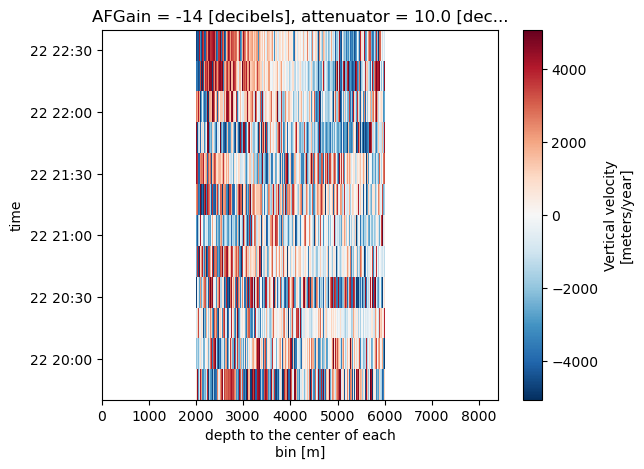

In [ ]:
lower_limit_on_fit = 6000
upper_limit_on_fit = 2000
velocity_cropped = w.squeeze().where( (w.bin_depth < lower_limit_on_fit) & (w.bin_depth > upper_limit_on_fit))
velocity_cropped.isel(attenuator_setting_pair=0).plot()


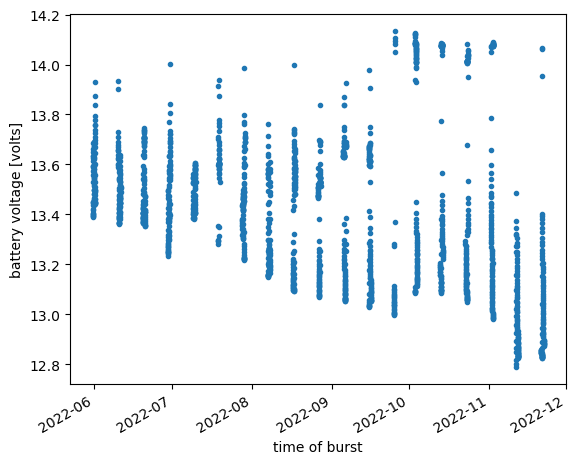

In [4]:
xa.data.battery_voltage.plot(marker='.', linestyle='');

In [5]:
import numpy as np
time_in_field = xa.data.time[-1] - xa.data.time[13]
days = time_in_field.values.astype('timedelta64[D]')
days / np.timedelta64(1, 'D')

174.0

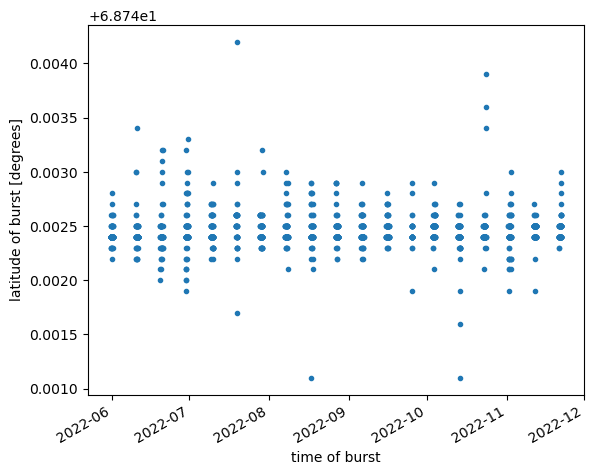

In [6]:
xa.data.latitude.plot(marker='.', linestyle='')

In [7]:
# time: 470chirp_time: 40001  chirp_num: 20   attenuator_setting_pair: 2
xa.data.profile.isel(time = 1, chirp_num = 0, attenuator_setting_pair = 0)

<xarray.DataArray 'profile' (profile_range: 6658)>
array([ 1.02348115e-02+0.00000000e+00j,  1.16264167e-05+9.00696658e-03j,
       -6.05166028e-03+2.10966246e-05j, ...,
       -1.26409923e-05-9.54152700e-06j,  2.18546563e-05-1.21705819e-05j,
        3.34224462e-06+2.72581429e-05j])
Coordinates:
    time           datetime64[ns] 2022-05-31T11:13:10
  * profile_range  (profile_range) float64 0.0 0.2103 0.4206 ... 1.4e+03 1.4e+03
    chirp_num      int64 0
    filename       <U83 'ldeo-glaciology/GL_apres_2022/A103/CardA/DIR2022-05-...
    burst_number   int64 1
    AFGain         int64 -4
    attenuator     float64 5.0
Attributes:
    long_name:    profile
    units:        -
    description:  complex profile computed from the fourier transform of the ...

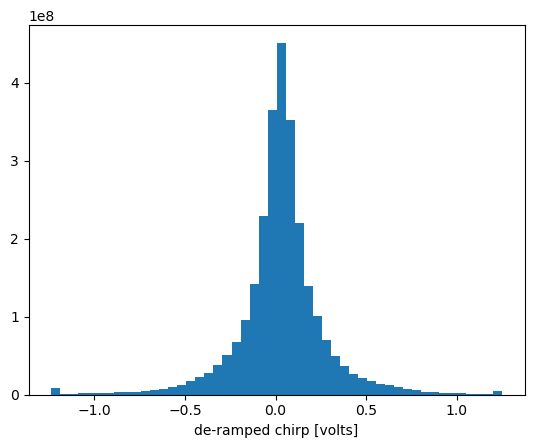

In [8]:
xa.data.chirp.plot(bins = 50);

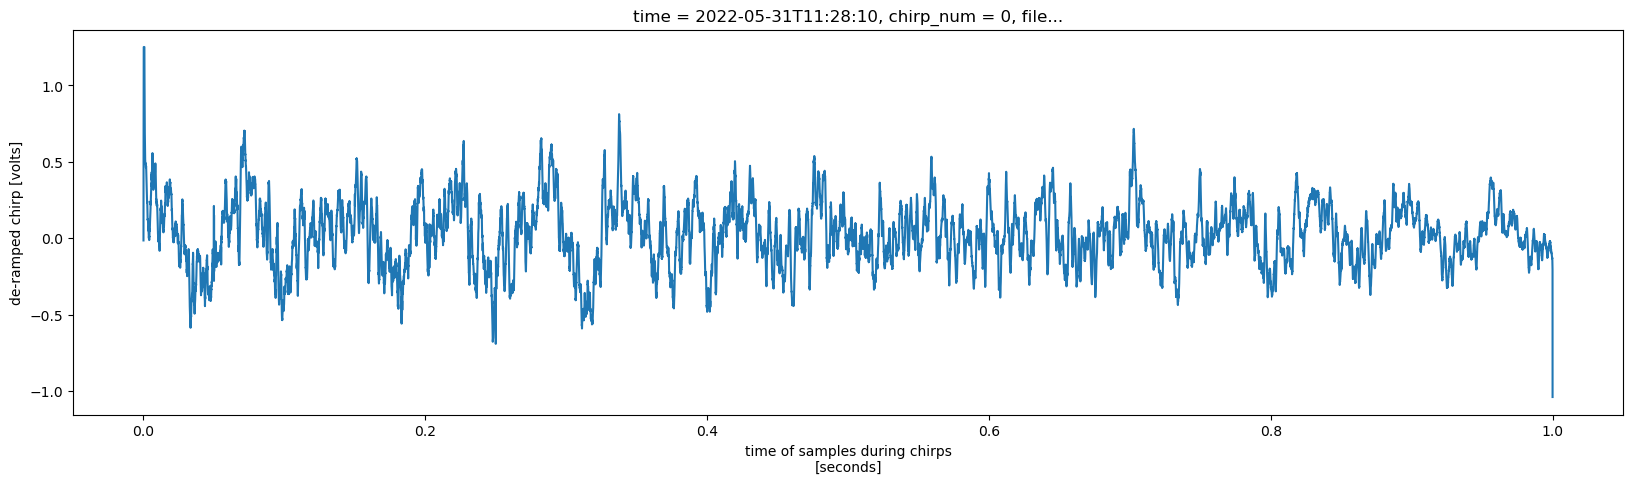

In [9]:
xa.data.chirp.isel(time=2, chirp_num = 0, attenuator_setting_pair=0).plot(figsize = (20,5));

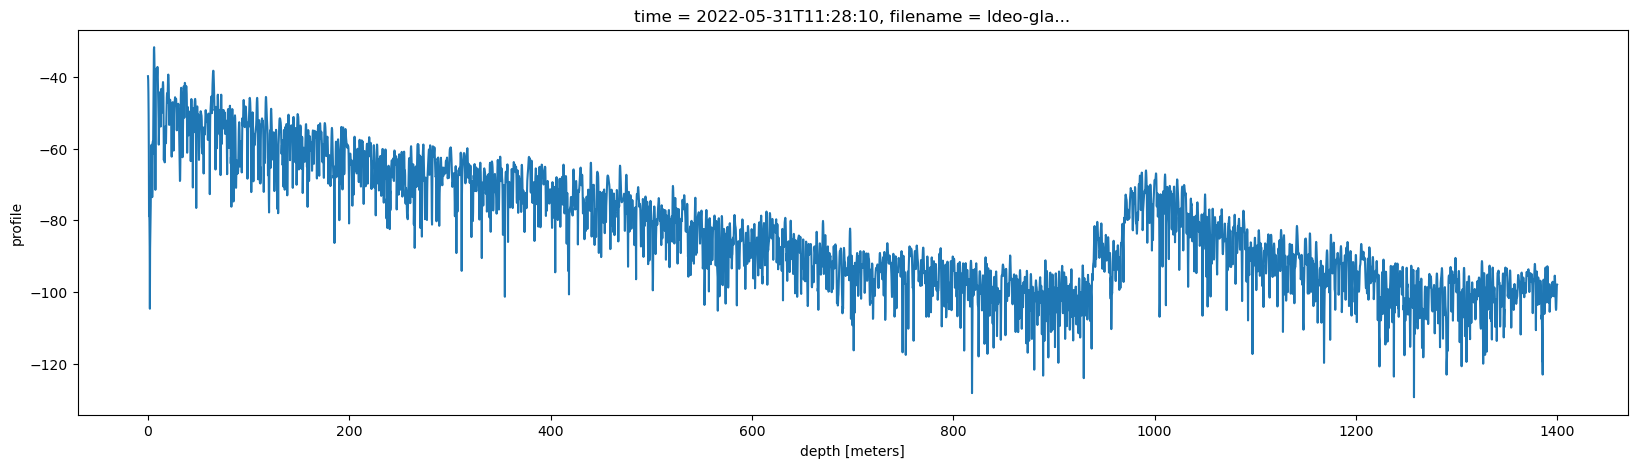

In [10]:
# stack the data (this line stacks both the chirps and the profiles, but you could just do the profiles)
stacked = xa.data.isel(time=2, attenuator_setting_pair=0).mean(dim='chirp_num')
# extract just the profiles
stacked_profile = stacked.profile
# compute the decibel profiles
dB = xa.dB(stacked_profile)
# plot the result
dB.plot(figsize = (20,5));

In [ ]:
import fsspec
import xarray as xr
import json
import gcsfs
## define a mapper to the ldeo-glaciology bucket
### needs a token
with open('/Users/jkingslake/Documents/misc/ldeo-glaciology-bc97b12df06b.json') as token_file:
    token = json.load(token_file)

filename = 'gs://ldeo-glaciology/GL_apres_2022_zarr_test_01'
    
mapper = fsspec.get_mapper(filename, mode='w', token=token)

xa.data.to_zarr(mapper)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jkingslake/Documents/misc/ldeo-glaciology-bc97b12df06b.json'